# 🔧 שלב 2: עיבוד נתונים והכנה למודל (Data Preprocessing)

## מטרה
בשלב זה נכין את הנתונים למודל Machine Learning:
1. **בדיקת ערכים חסרים** והחלפתם בממוצעים
2. **קידוד משתנים קטגוריאליים** (Encoding)
3. **בחירת משתנים רלוונטיים**
4. **זיהוי והסרת ערכים קיצוניים** (Outliers)
5. **הפרדת X ו-y**
6. **פיצול לנתוני אימון ובדיקה** (80/20)
7. **נורמליזציה** (StandardScaler)

---

In [1]:
# ייבוא ספריות
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("✓ ספריות נטענו בהצלחה")

✓ ספריות נטענו בהצלחה


## 1. טעינת הנתונים

In [2]:
# טעינת הנתונים
df = pd.read_csv('lamborghini_sales_2020_2025.csv')
df_ml = df.copy()

print("="*80)
print("נתונים למודל Machine Learning")
print("="*80)
print(f"\nמספר רשומות: {len(df_ml)}")
print(f"מספר עמודות: {len(df_ml.columns)}")
print(f"\nעמודות: {list(df_ml.columns)}")
print(f"\nצורת הנתונים: {df_ml.shape}")

נתונים למודל Machine Learning

מספר רשומות: 54
מספר עמודות: 9

עמודות: ['Model', 'Year', 'Region', 'Color', 'Fuel Type', 'Base Price (USD)', 'Horsepower', 'Sales Volume', 'Turbo (Yes/No)']

צורת הנתונים: (54, 9)


## 2. בדיקת ערכים חסרים

**למה זה חשוב?**  
ערכים חסרים (Missing Values) יכולים לגרום לשגיאות במודל או להטות את התוצאות.  
אם יש ערכים חסרים, נטפל בהם לפי סוג העמודה.

In [3]:
# בדיקת ערכים חסרים
print("="*80)
print("בדיקת ערכים חסרים (Missing Values)")
print("="*80)

missing_values = df_ml.isnull().sum()
missing_percentage = (df_ml.isnull().sum() / len(df_ml)) * 100

missing_df = pd.DataFrame({
    'Column': df_ml.columns,
    'Missing Values': missing_values.values,
    'Percentage': missing_percentage.values
})

print(missing_df)

if df_ml.isnull().sum().sum() == 0:
    print("\n✓ אין ערכים חסרים בנתונים!")
else:
    print(f"\n⚠ נמצאו {df_ml.isnull().sum().sum()} ערכים חסרים")
    
    # מילוי ערכים חסרים
    numeric_columns = df_ml.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        if df_ml[col].isnull().sum() > 0:
            mean_value = df_ml[col].mean()
            df_ml[col].fillna(mean_value, inplace=True)
            print(f"  - {col}: מולאו בממוצע ({mean_value:.2f})")
    
    categorical_columns = df_ml.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df_ml[col].isnull().sum() > 0:
            mode_value = df_ml[col].mode()[0]
            df_ml[col].fillna(mode_value, inplace=True)
            print(f"  - {col}: מולאו בערך הנפוץ ({mode_value})")

print(f"\nסה\"כ ערכים חסרים אחרי טיפול: {df_ml.isnull().sum().sum()}")

בדיקת ערכים חסרים (Missing Values)
             Column  Missing Values  Percentage
0             Model               0         0.0
1              Year               0         0.0
2            Region               0         0.0
3             Color               0         0.0
4         Fuel Type               0         0.0
5  Base Price (USD)               0         0.0
6        Horsepower               0         0.0
7      Sales Volume               0         0.0
8    Turbo (Yes/No)               0         0.0

✓ אין ערכים חסרים בנתונים!

סה"כ ערכים חסרים אחרי טיפול: 0


## 3. קידוד משתנים קטגוריאליים (Encoding)

**מה זה קידוד?**  
מודלי Machine Learning עובדים רק עם מספרים. משתנים קטגוריאליים (טקסט) צריכים להפוך למספרים.

**שיטות:**
- **Label Encoding**: המרה לערכים 0, 1, 2... (למשתנים בינאריים)
- **One-Hot Encoding**: יצירת עמודה נפרדת לכל קטגוריה (למשתנים רב-קטגוריאליים)

In [4]:
# קידוד משתנים קטגוריאליים
print("="*80)
print("קידוד משתנים קטגוריאליים (Encoding)")
print("="*80)

categorical_cols = df_ml.select_dtypes(include=['object']).columns.tolist()
print(f"\nעמודות קטגוריאליות: {categorical_cols}\n")

encoding_info = {}

# Label Encoding למשתנים בינאריים
if 'Turbo (Yes/No)' in df_ml.columns:
    le = LabelEncoder()
    df_ml['Turbo_Encoded'] = le.fit_transform(df_ml['Turbo (Yes/No)'])
    encoding_info['Turbo'] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"✓ Turbo: {encoding_info['Turbo']}")

if 'Fuel Type' in df_ml.columns:
    le = LabelEncoder()
    df_ml['Fuel_Type_Encoded'] = le.fit_transform(df_ml['Fuel Type'])
    encoding_info['Fuel Type'] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"✓ Fuel Type: {encoding_info['Fuel Type']}")

# One-Hot Encoding למשתנים רב-קטגוריאליים
onehot_cols = ['Model', 'Region', 'Color']

for col in onehot_cols:
    if col in df_ml.columns:
        dummies = pd.get_dummies(df_ml[col], prefix=col, drop_first=True)
        df_ml = pd.concat([df_ml, dummies], axis=1)
        print(f"✓ {col}: נוצרו {len(dummies.columns)} עמודות חדשות")
        encoding_info[col] = dummies.columns.tolist()

print(f"\n✓ קידוד הושלם! עכשיו יש {len(df_ml.columns)} עמודות")
print(f"צורה חדשה: {df_ml.shape}")

קידוד משתנים קטגוריאליים (Encoding)

עמודות קטגוריאליות: ['Model', 'Region', 'Color', 'Fuel Type', 'Turbo (Yes/No)']

✓ Turbo: {'Yes': np.int64(0)}
✓ Fuel Type: {'Gasoline': np.int64(0), 'Hybrid': np.int64(1)}
✓ Model: נוצרו 5 עמודות חדשות
✓ Region: נוצרו 2 עמודות חדשות
✓ Color: נוצרו 8 עמודות חדשות

✓ קידוד הושלם! עכשיו יש 26 עמודות
צורה חדשה: (54, 26)


## 4. בחירת משתנים רלוונטיים

**מה נעשה כאן?**
- נסיר עמודות קטגוריאליות מקוריות (שכבר קידדנו)
- נסיר Sales Volume (לא רלוונטי לחיזוי מחיר)
- נשאיר רק משתנים שמשפיעים על המחיר

In [5]:
# הסרת עמודות לא רלוונטיות
print("="*80)
print("בחירת משתנים רלוונטיים למודל")
print("="*80)

columns_to_drop = ['Model', 'Region', 'Color', 'Fuel Type', 'Turbo (Yes/No)', 'Sales Volume']
df_ml_cleaned = df_ml.drop(columns=[col for col in columns_to_drop if col in df_ml.columns], errors='ignore')

print(f"\n✓ הוסרו {len(columns_to_drop)} עמודות")
print(f"✓ נותרו {len(df_ml_cleaned.columns)} עמודות\n")

print("עמודות שנשארו:")
print("-" * 40)
for i, col in enumerate(df_ml_cleaned.columns, 1):
    print(f"{i:2}. {col}")

if 'Base Price (USD)' in df_ml_cleaned.columns:
    print("\n✓ עמודת המחיר (Target) קיימת")

print(f"\nצורה סופית: {df_ml_cleaned.shape}")

בחירת משתנים רלוונטיים למודל

✓ הוסרו 6 עמודות
✓ נותרו 20 עמודות

עמודות שנשארו:
----------------------------------------
 1. Year
 2. Base Price (USD)
 3. Horsepower
 4. Turbo_Encoded
 5. Fuel_Type_Encoded
 6. Model_Huracán
 7. Model_Huracán (Temerario)
 8. Model_Revuelto
 9. Model_Urus
10. Model_Urus SE
11. Region_Americas
12. Region_EMEA
13. Color_Blue
14. Color_Green
15. Color_Grey
16. Color_Orange
17. Color_Red
18. Color_Silver
19. Color_White
20. Color_Yellow

✓ עמודת המחיר (Target) קיימת

צורה סופית: (54, 20)


## 5. זיהוי Outliers (ערכים קיצוניים)

**מה זה Outliers?**  
ערכים חריגים שיכולים לשבש את המודל.

**שיטת IQR:**
- Q1 = רבעון תחתון (25%)
- Q3 = רבעון עליון (75%)
- IQR = Q3 - Q1
- ערכים מחוץ ל-[Q1-1.5×IQR, Q3+1.5×IQR] = outliers

זיהוי ערכים קיצוניים (Outliers)

Base Price (USD):
  Q1: 265,000.00, Q3: 550,000.00, IQR: 285,000.00
  Outliers: 0

Horsepower:
  Q1: 631.00, Q3: 769.00, IQR: 138.00
  Outliers: 6

Year:
  Q1: 2,021.00, Q3: 2,024.00, IQR: 3.00
  Outliers: 0


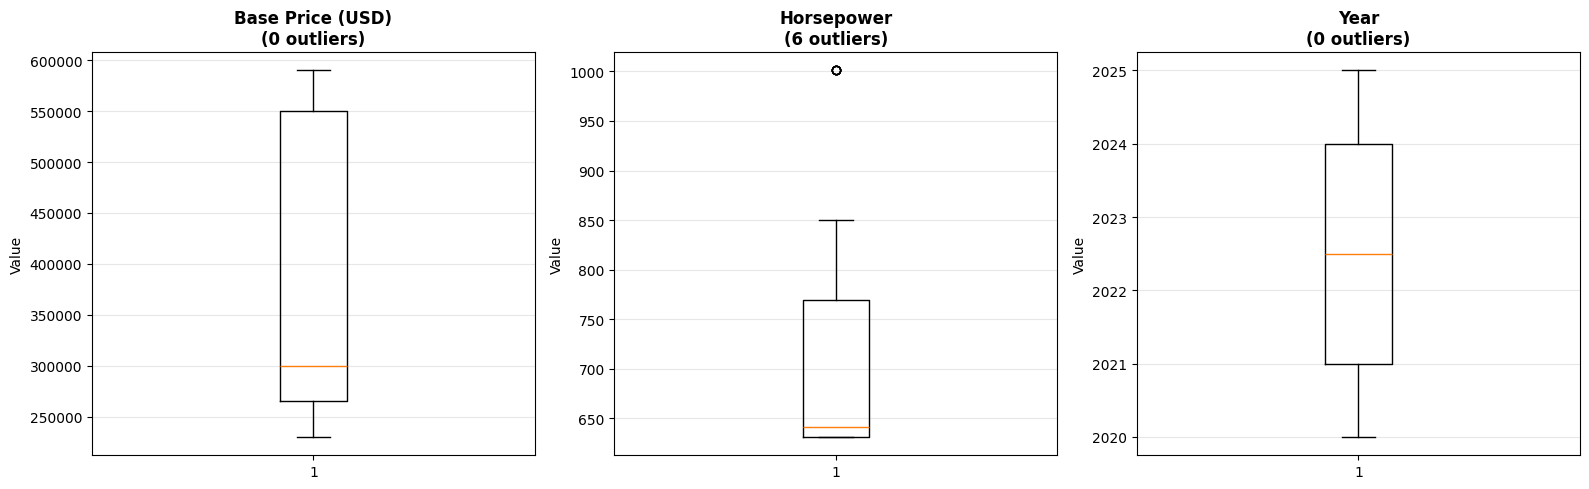


החלטה: Outliers הם לגיטימיים (דגמי יוקרה) - לא נסיר אותם
סה"כ שורות: 54


In [6]:
# זיהוי Outliers
print("="*80)
print("זיהוי ערכים קיצוניים (Outliers)")
print("="*80)

numeric_cols_for_outliers = ['Base Price (USD)', 'Horsepower', 'Year']
outliers_found = {}

fig, axes = plt.subplots(1, len(numeric_cols_for_outliers), figsize=(16, 5))

for idx, col in enumerate(numeric_cols_for_outliers):
    if col in df_ml_cleaned.columns:
        Q1 = df_ml_cleaned[col].quantile(0.25)
        Q3 = df_ml_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df_ml_cleaned[(df_ml_cleaned[col] < lower_bound) | (df_ml_cleaned[col] > upper_bound)]
        outliers_found[col] = len(outliers)
        
        axes[idx].boxplot(df_ml_cleaned[col], vert=True)
        axes[idx].set_title(f'{col}\n({outliers_found[col]} outliers)', fontweight='bold')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(axis='y', alpha=0.3)
        
        print(f"\n{col}:")
        print(f"  Q1: {Q1:,.2f}, Q3: {Q3:,.2f}, IQR: {IQR:,.2f}")
        print(f"  Outliers: {outliers_found[col]}")

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("החלטה: Outliers הם לגיטימיים (דגמי יוקרה) - לא נסיר אותם")
print(f"סה\"כ שורות: {len(df_ml_cleaned)}")
print("="*80)

## 6. הפרדת X ו-y

**X (Features)**: המשתנים הבלתי תלויים - מהם נחזה  
**y (Target)**: המשתנה התלוי - מה שאנחנו רוצים לחזות (המחיר)

In [7]:
# הפרדת X ו-y
print("="*80)
print("הפרדת משתנים: X (Features) ו-y (Target)")
print("="*80)

if 'Base Price (USD)' not in df_ml_cleaned.columns:
    print("⚠ שגיאה: עמודת המחיר לא נמצאה!")
else:
    y = df_ml_cleaned['Base Price (USD)']
    X = df_ml_cleaned.drop('Base Price (USD)', axis=1)
    
    print(f"\n✓ משתנה תלוי (y - Target):")
    print(f"  - שם: Base Price (USD)")
    print(f"  - צורה: {y.shape}")
    print(f"  - טווח: ${y.min():,.0f} - ${y.max():,.0f}")
    print(f"  - ממוצע: ${y.mean():,.0f}")
    
    print(f"\n✓ משתנים בלתי תלויים (X - Features):")
    print(f"  - מספר משתנים: {X.shape[1]}")
    print(f"  - מספר דוגמאות: {X.shape[0]}")
    print(f"  - צורה: {X.shape}")
    
    print(f"\n  רשימת משתנים:")
    for i, col in enumerate(X.columns, 1):
        print(f"    {i:2}. {col}")
    
    print("\n✓ הפרדה הושלמה!")

הפרדת משתנים: X (Features) ו-y (Target)

✓ משתנה תלוי (y - Target):
  - שם: Base Price (USD)
  - צורה: (54,)
  - טווח: $230,000 - $590,000
  - ממוצע: $374,722

✓ משתנים בלתי תלויים (X - Features):
  - מספר משתנים: 19
  - מספר דוגמאות: 54
  - צורה: (54, 19)

  רשימת משתנים:
     1. Year
     2. Horsepower
     3. Turbo_Encoded
     4. Fuel_Type_Encoded
     5. Model_Huracán
     6. Model_Huracán (Temerario)
     7. Model_Revuelto
     8. Model_Urus
     9. Model_Urus SE
    10. Region_Americas
    11. Region_EMEA
    12. Color_Blue
    13. Color_Green
    14. Color_Grey
    15. Color_Orange
    16. Color_Red
    17. Color_Silver
    18. Color_White
    19. Color_Yellow

✓ הפרדה הושלמה!


## 7. פיצול Train-Test (80/20)

**למה לפצל?**
- **Train (80%)**: ללמד את המודל
- **Test (20%)**: לבדוק את המודל על נתונים שהוא לא ראה

זה מבטיח שהמודל באמת למד ולא רק "שינן"!

In [8]:
# פיצול Train-Test
print("="*80)
print("פיצול נתונים: Train-Test Split")
print("="*80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

print(f"\n✓ פיצול הושלם!")
print(f"\nנתוני אימון (Train):")
print(f"  - X_train: {X_train.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"  - אחוז: {(len(X_train)/len(X))*100:.0f}%")

print(f"\nנתוני בדיקה (Test):")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_test: {y_test.shape}")
print(f"  - אחוז: {(len(X_test)/len(X))*100:.0f}%")

print(f"\nסטטיסטיקות y:")
print(f"  Train - ממוצע: ${y_train.mean():,.0f}")
print(f"  Test  - ממוצע: ${y_test.mean():,.0f}")

פיצול נתונים: Train-Test Split

✓ פיצול הושלם!

נתוני אימון (Train):
  - X_train: (43, 19)
  - y_train: (43,)
  - אחוז: 80%

נתוני בדיקה (Test):
  - X_test: (11, 19)
  - y_test: (11,)
  - אחוז: 20%

סטטיסטיקות y:
  Train - ממוצע: $388,721
  Test  - ממוצע: $320,000


## 8. נורמליזציה (Feature Scaling)

**למה צריך?**  
משתנים בסקאלות שונות יכולים להשפיע לא נכון על המודל.

**StandardScaler:**  
הופך כל משתנה לממוצע 0 וסטיית תקן 1

**נוסחה:** `z = (x - μ) / σ`

In [9]:
# נורמליזציה
print("="*80)
print("נורמליזציה (Feature Scaling) - StandardScaler")
print("="*80)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\n✓ נורמליזציה הושלמה!")

print(f"\nסטטיסטיקות אחרי נורמליזציה:")
print(f"  ממוצע: {X_train_scaled.mean().mean():.6f} (קרוב ל-0)")
print(f"  סטיית תקן: {X_train_scaled.std().mean():.6f} (קרוב ל-1)")

print(f"\n✓ הנתונים מנורמלים ומוכנים למודל!")

נורמליזציה (Feature Scaling) - StandardScaler

✓ נורמליזציה הושלמה!

סטטיסטיקות אחרי נורמליזציה:
  ממוצע: -0.000000 (קרוב ל-0)
  סטיית תקן: 0.958580 (קרוב ל-1)

✓ הנתונים מנורמלים ומוכנים למודל!


## 9. שמירת הנתונים המעובדים

In [10]:
# שמירת הנתונים
print("="*80)
print("שמירת נתונים מעובדים")
print("="*80)

X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False, header=['Base Price (USD)'])
y_test.to_csv('y_test.csv', index=False, header=['Base Price (USD)'])

print("\n✓ כל הקבצים נשמרו:")
print("  - X_train_scaled.csv")
print("  - X_test_scaled.csv")
print("  - y_train.csv")
print("  - y_test.csv")

print("\n" + "="*80)
print("✅ עיבוד הנתונים הושלם בהצלחה!")
print("📌 המשך למחברת הבאה: 3_model_building.ipynb")
print("="*80)

שמירת נתונים מעובדים

✓ כל הקבצים נשמרו:
  - X_train_scaled.csv
  - X_test_scaled.csv
  - y_train.csv
  - y_test.csv

✅ עיבוד הנתונים הושלם בהצלחה!
📌 המשך למחברת הבאה: 3_model_building.ipynb


## 📋 סיכום שלב עיבוד הנתונים

✅ **מה עשינו:**
- בדקנו ערכים חסרים (אין)
- קידדנו משתנים קטגוריאליים
- בחרנו משתנים רלוונטיים
- זיהינו outliers (החלטנו לשמור)
- הפרדנו X ו-y
- פיצלנו 80/20 Train-Test
- ביצענו נורמליזציה

**הנתונים מוכנים לבניית מודל! 🚀**